<a href="https://colab.research.google.com/github/sivasuresh12/loopio_team3/blob/main/Team3_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
%cd /content/gdrive/My Drive/Loopio Team 3

/content/gdrive/My Drive/Loopio Team 3


In [3]:
!pwd

/content/gdrive/My Drive/Loopio Team 3


### Step 1: Data Loading

In [4]:
import pandas as pd

# Read the Parquet file
df = pd.read_parquet('loopio_team3/GT_IPI.parquet')

# Display the first few rows of the dataframe
df.head()

,begins_with,css_pk,customer_pk,is_italic,is_bold,html_pk,id,is_underline,target,form_rel_depth,...,lang_pct_verb_gerund_present_participle,lang_pct_verb_past_participle,lang_pct_verb_sing_present_non_third_person,lang_pct_verb_3rd_person_sing_present,lang_pct_wh_determiner,lang_pct_wh_pronoun,lang_pct_possessive_wh_pronoun,lang_pct_wh_abverb,lang_pct_punct,lang_pct_sym
0,text,5625805,1855,0,0,5625806,423509|5625806|3941A609,0,question,82,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.176471,0.0
1,text,5625805,1855,0,0,5625806,423509|5625806|1D86D710,0,discarded,82,...,0.0,0.0,0.0,0.038462,0.0,0.0,0.0,0.0,0.076923,0.0
2,text,5625805,1855,0,0,5625806,423509|5625806|51F7EBA6,0,discarded,83,...,0.0,0.0,0.0,0.038462,0.0,0.0,0.0,0.0,0.076923,0.0
3,text,5625805,1855,0,0,5625806,423509|5625806|268B6CF4,0,question,84,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.200000,0.0
4,text,5625805,1855,0,0,5625806,423509|5625806|4BE54277,0,discarded,84,...,0.0,0.0,0.0,0.062500,0.0,0.0,0.0,0.0,0.000000,0.0


In [5]:
# df.to_csv('loopio_team3/test.csv')

In [6]:
len(df.columns)

87

### Step 2: Feature investigation and Feature Selection

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
css_pk_values = df.groupby('customer_pk')['css_pk'].nunique().sort_values(ascending=False)
css_pk_sampled = css_pk_values[:5]

In [9]:
df_sample = df[df['customer_pk'].isin(css_pk_sampled.index)]
len(df_sample)

562069

In [10]:
# investigate categorical columns
df_sample.select_dtypes(include=['object', 'category']).columns

Index(['begins_with', 'css_pk', 'html_pk', 'id', 'target', 'style'], dtype='object')

In [11]:
#Create X and y dataframes
X = df_sample.drop(columns=['css_pk', 'target', 'html_pk', 'id']) #not needed for prediction
y = df_sample['target']

In [12]:
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

X_encoded = encoder.fit_transform(X[categorical_cols])
X_encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(categorical_cols))

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_encoded = label_encoder.transform(y)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [13]:
# Drop original categorical columns and concatenate encoded columns
X = X.drop(columns=categorical_cols).reset_index(drop=True)
X = pd.concat([X, X_encoded_df], axis=1)

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso
import numpy as np

In [15]:
type(X)

pandas.core.frame.DataFrame

#### 2.1: Feature selection using Lasso regression

In [16]:
# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# X = scaler.transform(X)

# Fit a Lasso regression model with 0.01 as alpha
lasso = Lasso(alpha=0.01, max_iter=10000)  # Adjust alpha for regularization strength
lasso.fit(X_scaled, y_encoded)

Lasso(alpha=0.01, max_iter=10000)

                                     Feature  Importance
81                        begins_with_number    0.153607
35                             style_heading    0.111509
3                               is_underline    0.107169
12                                lang_ls_qm    0.077947
2                                    is_bold    0.064380
386                      style_dvsubcategory    0.056526
215                      style_bheading1alt1    0.046317
44         lang_pct_coordinating_conjunction    0.045932
249                          style_bodytext2    0.038515
38                                   style_q    0.037264
475                           style_heading2    0.036323
29                      para_foll_colour_ind    0.032225
31                                  is_title    0.032155
6                  form_font_family_mode_ind    0.032125
1                                  is_italic    0.031562
37                                 style_toc    0.031045
30                             

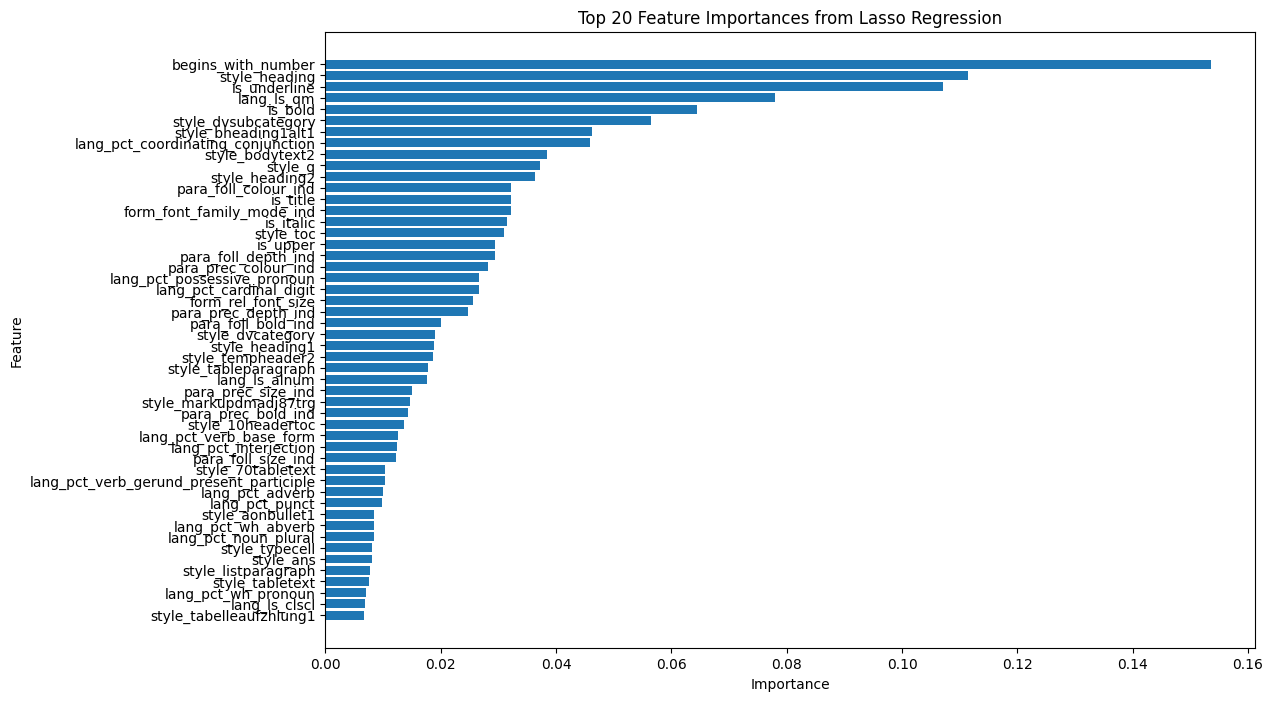

In [17]:
# Extract feature importance
importance = np.abs(lasso.coef_)
feature_names = X.columns

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the most important features
print(feature_importance_df.head(50))

# Visualize the feature importance
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'].head(50), feature_importance_df['Importance'].head(50))
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 20 Feature Importances from Lasso Regression')
plt.gca().invert_yaxis()
plt.show()

In [21]:
X_selected_lasso = X.iloc[:, importance > 0]
print(f"% columns selected: {len(X_selected_lasso.columns)/len(X.columns)}")
print(f"# columns selected: {len(X_selected_lasso.columns)}")

% columns selected: 0.09970674486803519
# columns selected: 102


#### 2.2 Feature selection using Decision Trees

In [41]:
# Tree-Based Feature Importance: Use tree-based models to rank feature importance.
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100)
model.fit(X, y)
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

In [42]:
# Only display tree selected columns
X_selected_tree = X.iloc[:, indices[:20]]
X_selected_tree = X.iloc[:, indices[:20]]

X_selected_tree.columns

Index(['lang_num_words', 'form_rel_depth', 'lang_mean_words_per_sent',
       'customer_pk', 'form_rel_font_size', 'lang_pct_punct',
       'begins_with_number', 'lang_pct_noun_singular', 'lang_pct_determiner',
       'begins_with_text', 'lang_pct_proper_noun_singular', 'lang_ls_qm',
       'lang_pct_verb_base_form', 'lang_pct_noun_plural',
       'lang_pct_preposition_subordinating_conjunction', 'lang_pct_adjective',
       'lang_ls_alnum', 'form_font_family_mode_ind',
       'lang_pct_coordinating_conjunction', 'is_title'],
      dtype='object')

<ipython-input-46-02219a0b5ba3>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=X, x='target', y=column, palette='Set1')


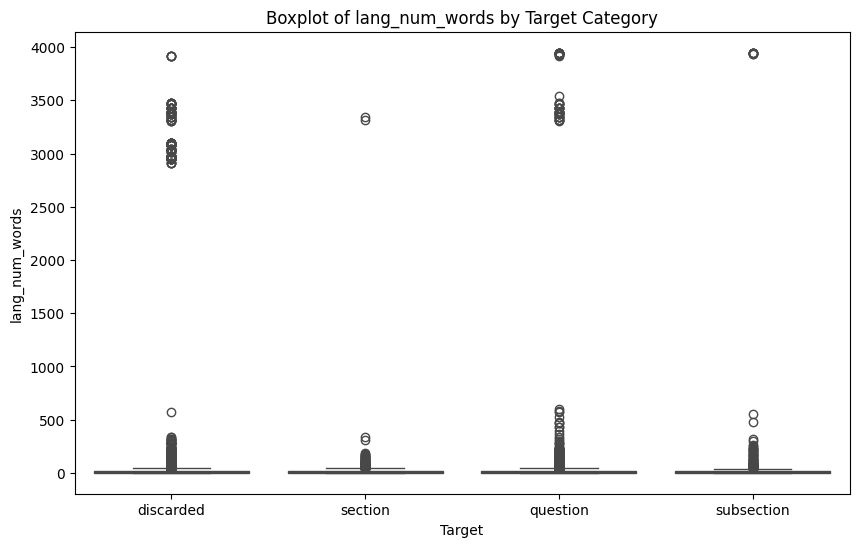

<ipython-input-46-02219a0b5ba3>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=X, x='target', y=column, palette='Set1')


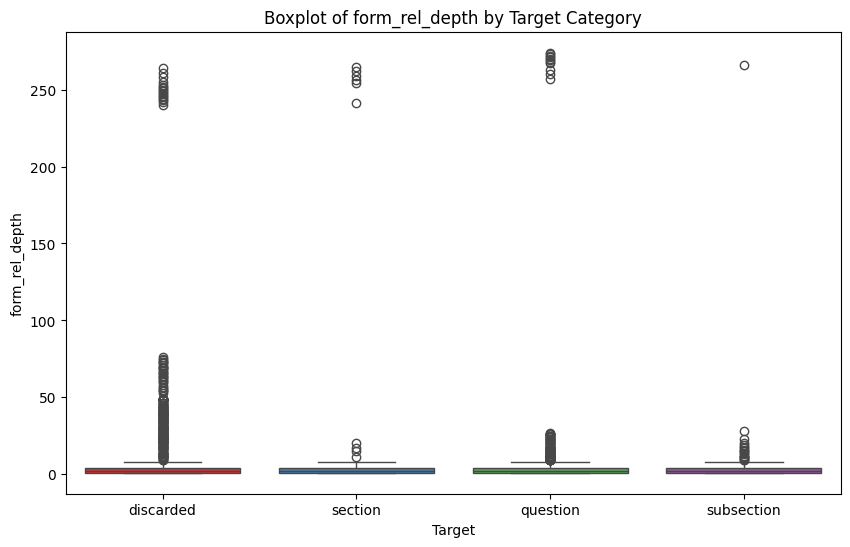

<ipython-input-46-02219a0b5ba3>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=X, x='target', y=column, palette='Set1')


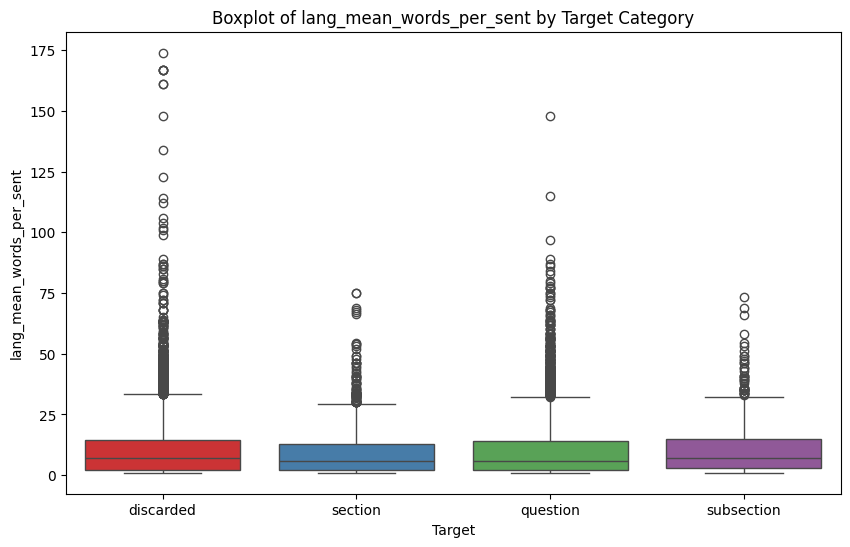

<ipython-input-46-02219a0b5ba3>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=X, x='target', y=column, palette='Set1')


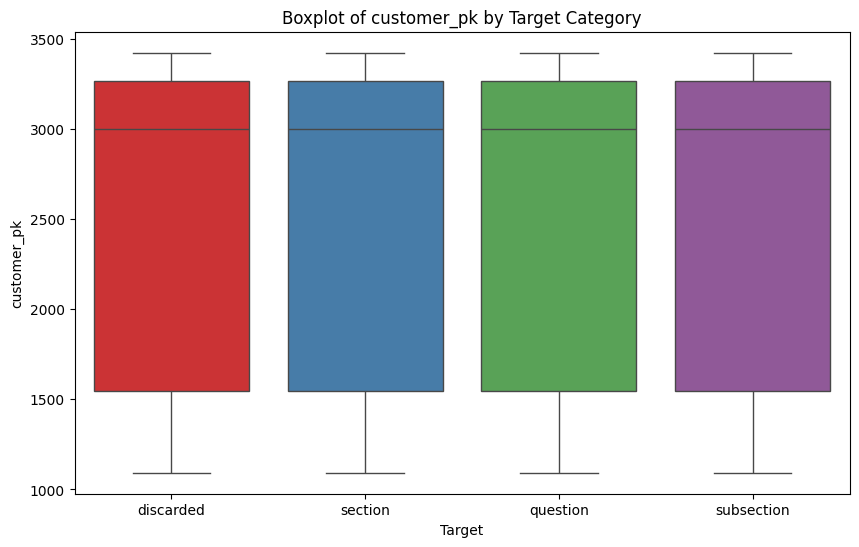

<ipython-input-46-02219a0b5ba3>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=X, x='target', y=column, palette='Set1')


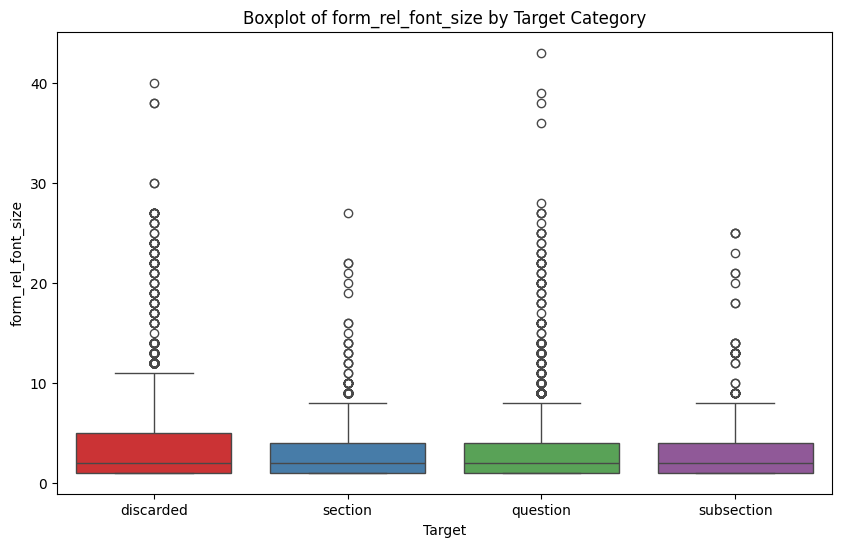

<ipython-input-46-02219a0b5ba3>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=X, x='target', y=column, palette='Set1')


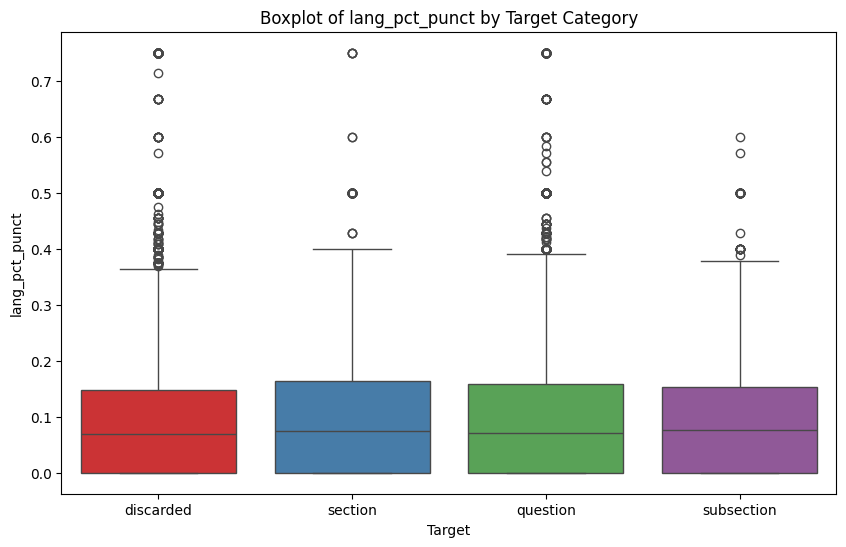

<ipython-input-46-02219a0b5ba3>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=X, x='target', y=column, palette='Set1')


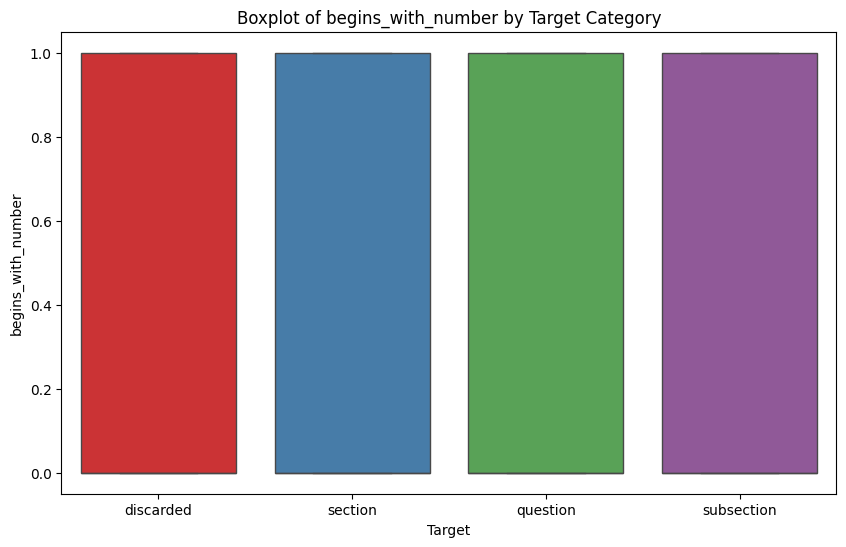

<ipython-input-46-02219a0b5ba3>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=X, x='target', y=column, palette='Set1')


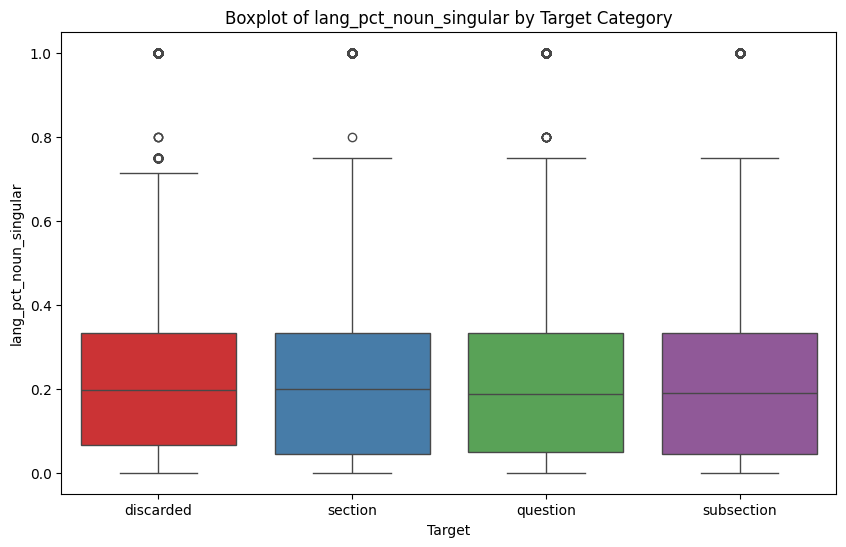

<ipython-input-46-02219a0b5ba3>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=X, x='target', y=column, palette='Set1')


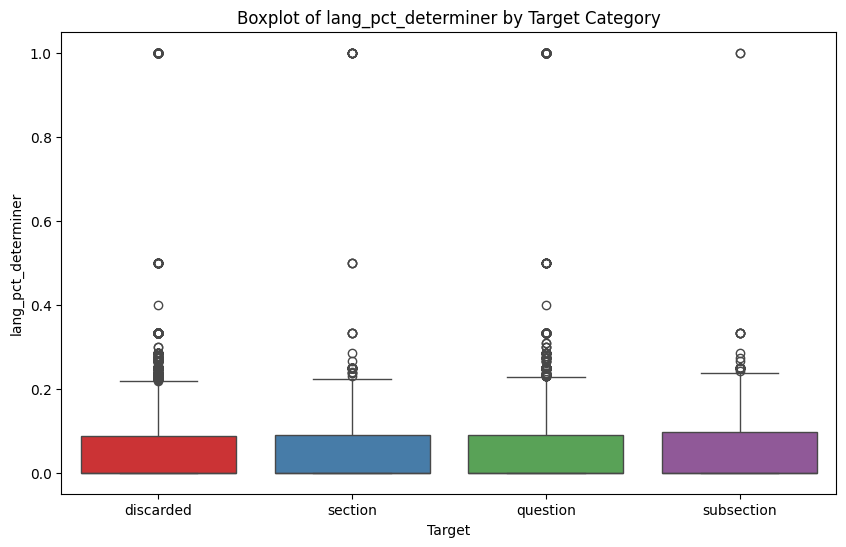

<ipython-input-46-02219a0b5ba3>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=X, x='target', y=column, palette='Set1')


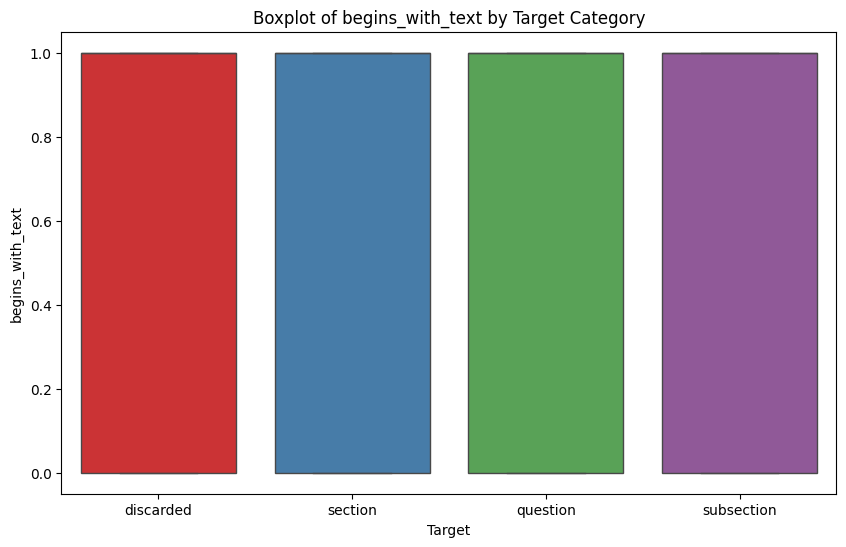

<ipython-input-46-02219a0b5ba3>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=X, x='target', y=column, palette='Set1')


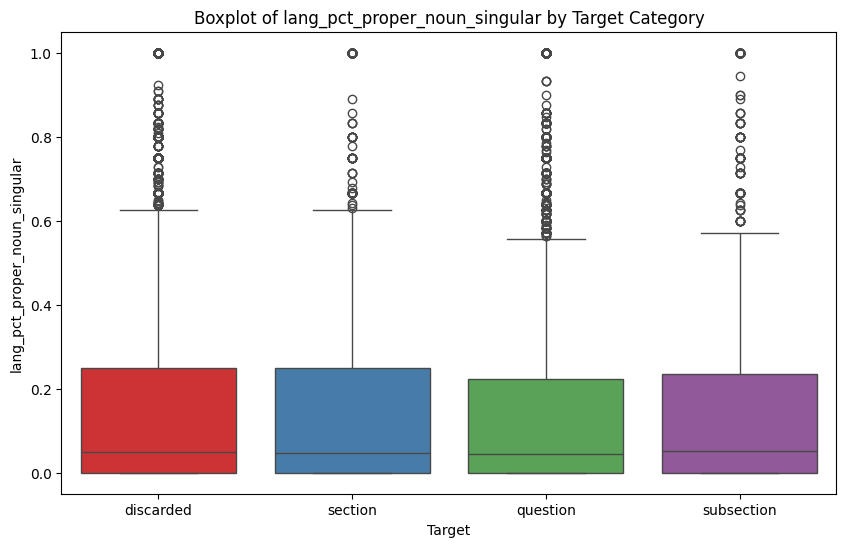

<ipython-input-46-02219a0b5ba3>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=X, x='target', y=column, palette='Set1')


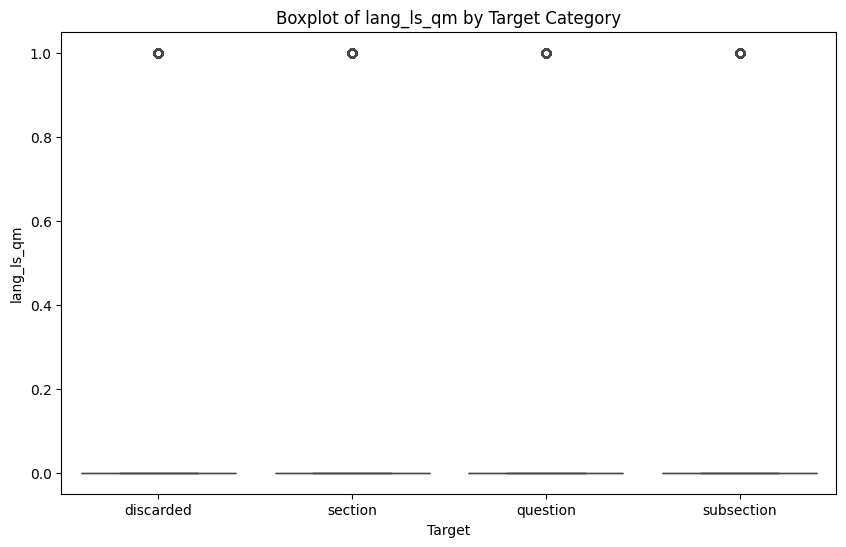

<ipython-input-46-02219a0b5ba3>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=X, x='target', y=column, palette='Set1')


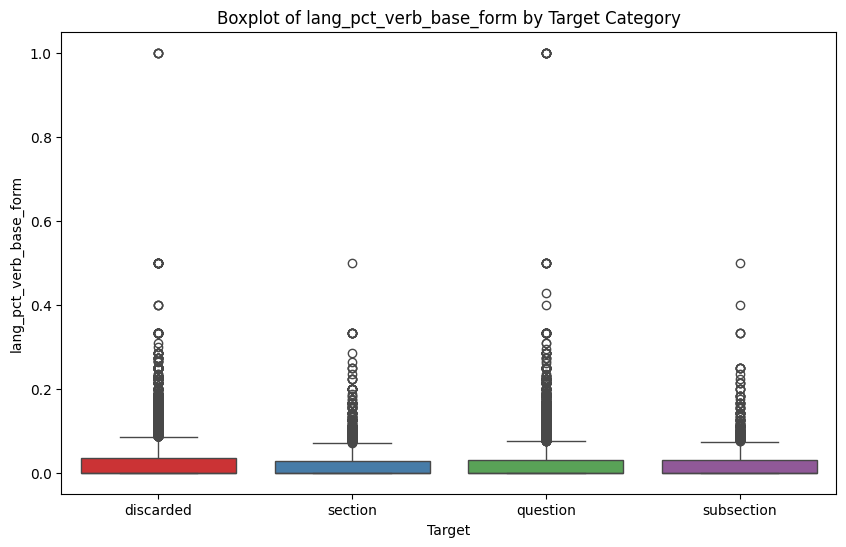

<ipython-input-46-02219a0b5ba3>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=X, x='target', y=column, palette='Set1')


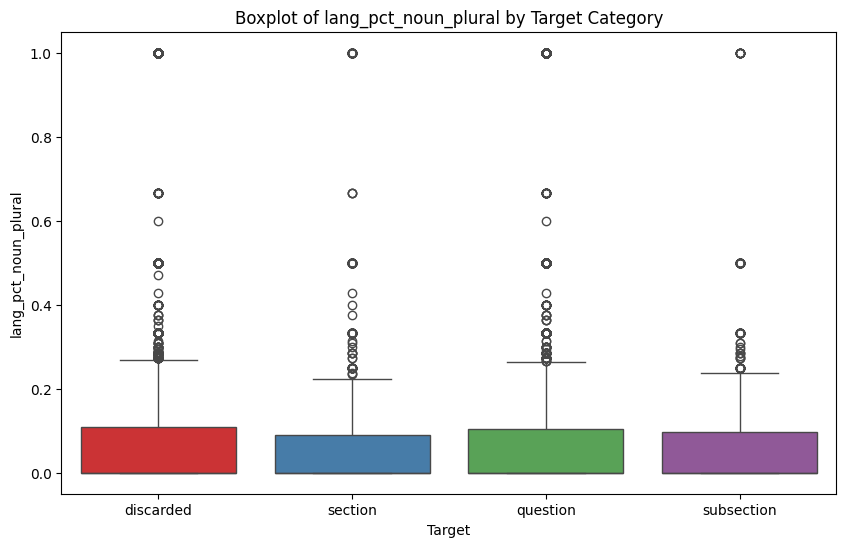

<ipython-input-46-02219a0b5ba3>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=X, x='target', y=column, palette='Set1')


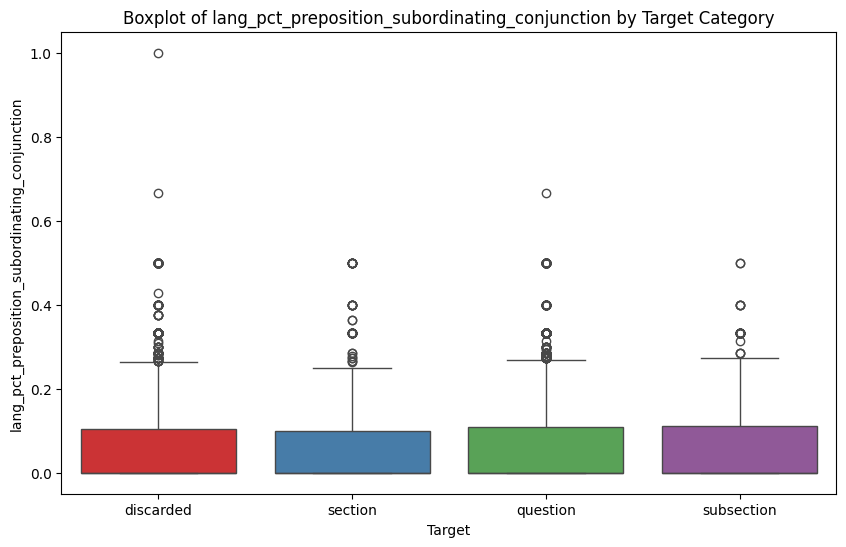

<ipython-input-46-02219a0b5ba3>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=X, x='target', y=column, palette='Set1')


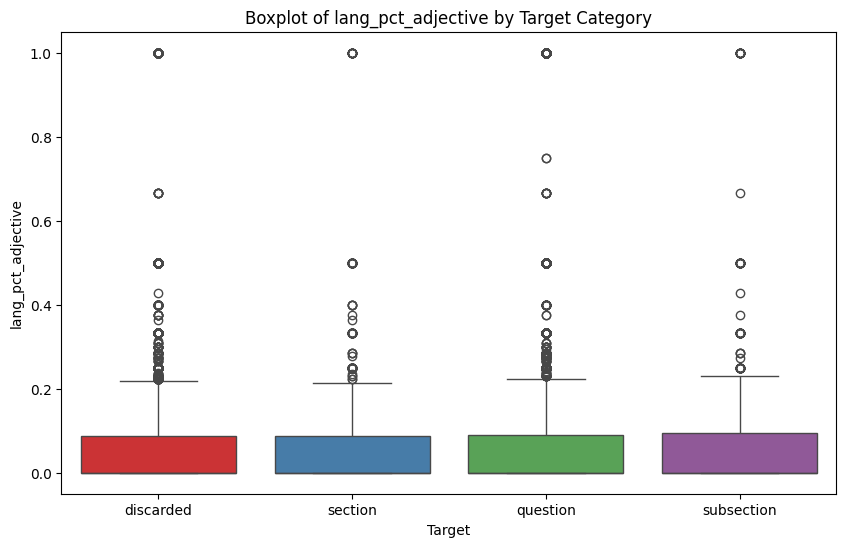

<ipython-input-46-02219a0b5ba3>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=X, x='target', y=column, palette='Set1')


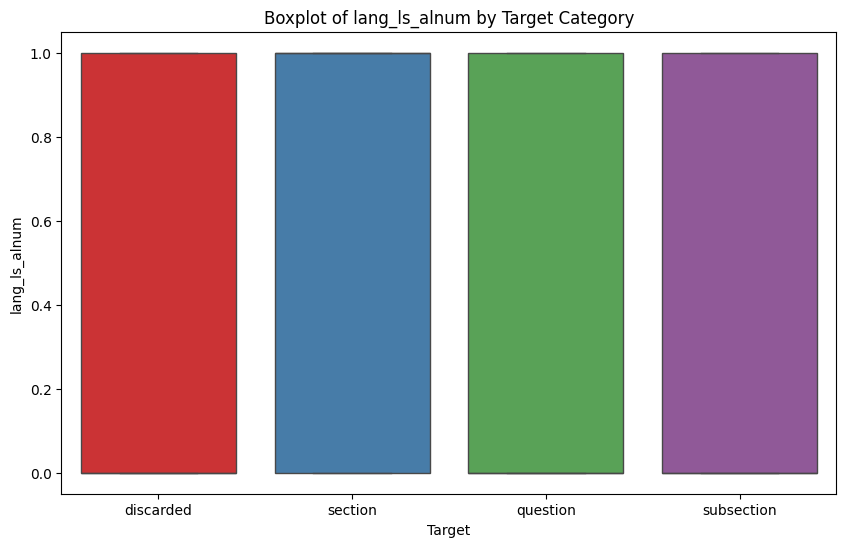

<ipython-input-46-02219a0b5ba3>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=X, x='target', y=column, palette='Set1')


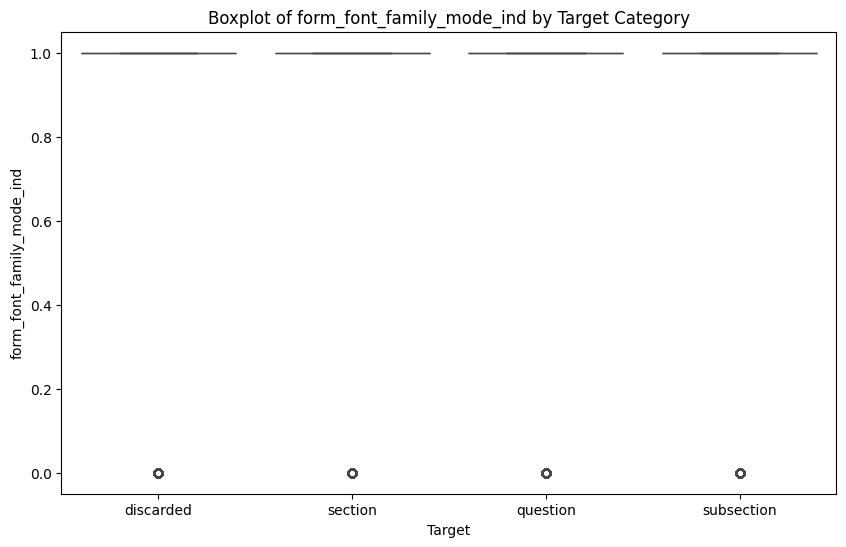

<ipython-input-46-02219a0b5ba3>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=X, x='target', y=column, palette='Set1')


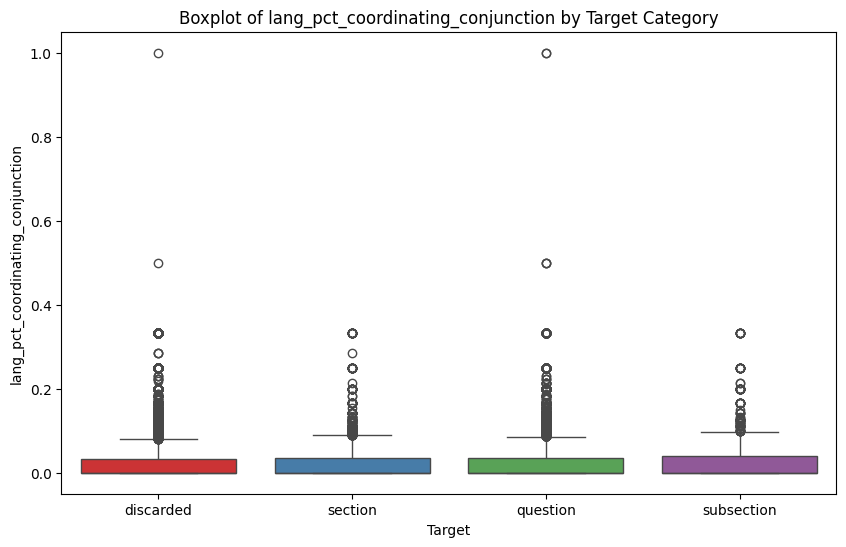

<ipython-input-46-02219a0b5ba3>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=X, x='target', y=column, palette='Set1')


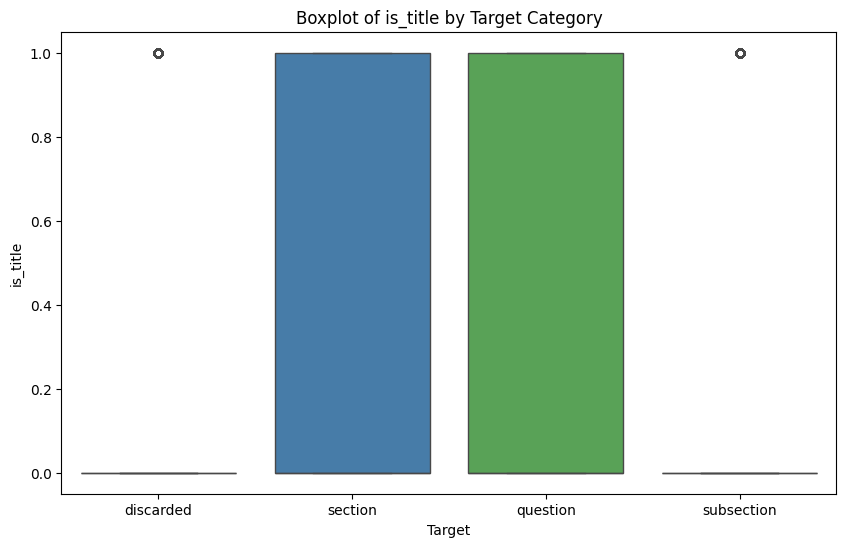

In [46]:
# boxplots for distribution of selected decision tree variables across target categories
X['target']=df_sample['target']
for column in X_selected_tree:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=X, x='target', y=column, palette='Set1')
    plt.title(f'Boxplot of {column} by Target Category')
    plt.xlabel('Target')
    plt.ylabel(column)
    plt.show()
X.drop(columns=['target'], inplace=True)

#### 2.3 Feature selection using RFE

In [ ]:
# report which features were selected by RFE
from sklearn.datasets import make_classification
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# define RFE
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)
# fit RFE
rfe.fit(X, y)
# summarize all features
for i in range(X.shape[1]):
 print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

### Step 3: Train/Test split and modeling

In [24]:
# Split unique css_pk values
unique_css_pk = df_sample['css_pk'].unique()
train_css_pk, test_css_pk = train_test_split(unique_css_pk, test_size=0.2, random_state=42)

# Filter the dataframe based on split css_pk values
train_df = df_sample[df_sample['css_pk'].isin(train_css_pk)].reset_index(drop=True)
test_df = df_sample[df_sample['css_pk'].isin(test_css_pk)].reset_index(drop=True)

# Separate features and target
X_train = train_df.drop(columns=['css_pk','html_pk','id','target'])
y_train = train_df['target']
X_test = test_df.drop(columns=['css_pk','html_pk','id','target'])
y_test = test_df['target']

# Display unique values in the target column to check for non-numeric values
print("Unique values in target column before encoding:", y_train.unique())

# Encode the target variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# One-hot encode categorical features
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

X_train_encoded = encoder.fit_transform(X_train[categorical_cols])
X_test_encoded = encoder.transform(X_test[categorical_cols])

X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=encoder.get_feature_names_out(categorical_cols))
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=encoder.get_feature_names_out(categorical_cols))

# Drop original categorical columns and concatenate encoded columns
X_train = X_train.drop(columns=categorical_cols).reset_index(drop=True)
X_test = X_test.drop(columns=categorical_cols).reset_index(drop=True)
X_train = pd.concat([X_train, X_train_encoded_df], axis=1)
X_test = pd.concat([X_test, X_test_encoded_df], axis=1)

Unique values in target column before encoding: ['discarded' 'section' 'question' 'subsection']


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [25]:
# filter to only selected columns to reduce compute
# X_selected_tree = ['customer_pk', 'lang_mean_words_per_sent', 'lang_num_words',
#                    'form_rel_font_size', 'form_rel_depth', 'lang_pct_punct',
#                    'lang_pct_noun_singular', 'lang_ls_qm', 'lang_pct_proper_noun_singular',
#                    'lang_pct_noun_plural', 'lang_pct_preposition_subordinating_conjunction', 'lang_pct_determiner',
#                    'begins_with_text', 'begins_with_number', 'lang_pct_adjective',
#                    'lang_ls_alnum', 'form_font_family_mode_ind', 'lang_pct_verb_base_form',
#                    'lang_pct_coordinating_conjunction',
#                    'lang_pct_verb_sing_present_non_third_person']
X_train_selected = X_train[X_selected_tree]
X_test_selected = X_test[X_selected_tree]

#### Logistic regression modeling

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a logistic regression model
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train_scaled, y_train_encoded)

# Make predictions
y_pred = log_reg.predict(X_test_scaled)

Accuracy: 0.7718
Precision: 0.7653
Recall: 0.7718
F1 Score: 0.7658

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.83      0.80     54340
           1       0.80      0.78      0.79     45046
           2       0.58      0.40      0.47      5129
           3       0.51      0.25      0.34      3264

    accuracy                           0.77    107779
   macro avg       0.66      0.56      0.60    107779
weighted avg       0.77      0.77      0.77    107779



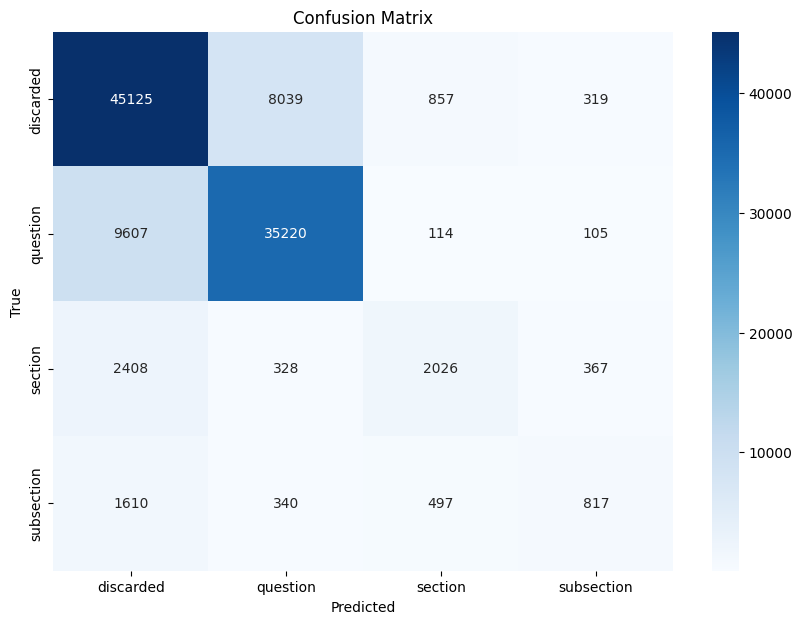

In [27]:
# Measure classification metrics
accuracy = accuracy_score(y_test_encoded, y_pred)
precision = precision_score(y_test_encoded, y_pred, average='weighted')
recall = recall_score(y_test_encoded, y_pred, average='weighted')
f1 = f1_score(y_test_encoded, y_pred, average='weighted')
class_report = classification_report(y_test_encoded, y_pred)
conf_matrix = confusion_matrix(y_test_encoded, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print('\nClassification Report:')
print(class_report)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

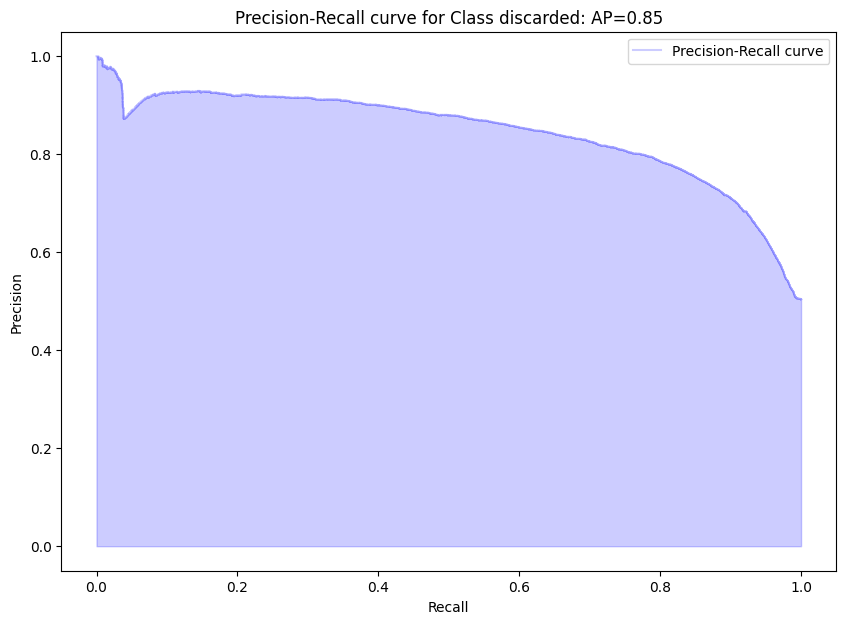

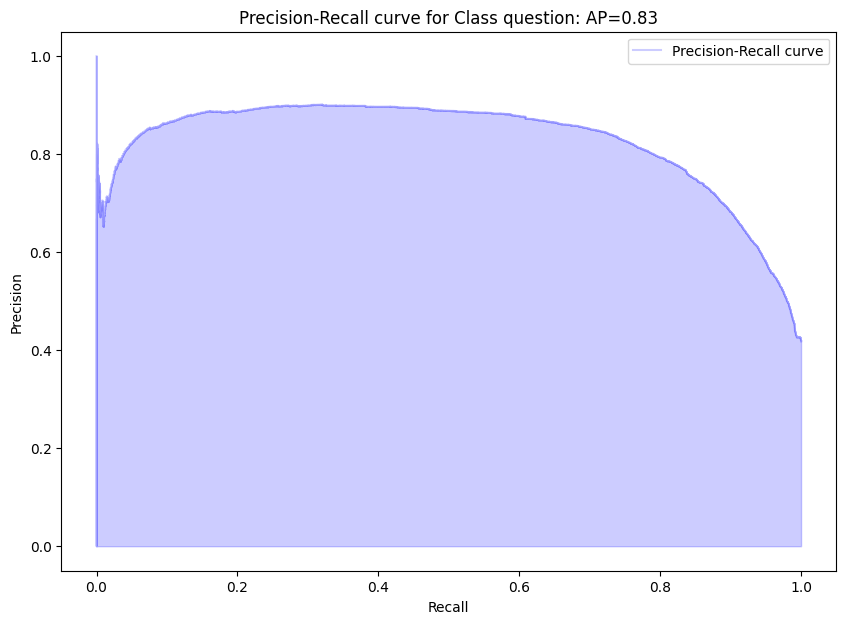

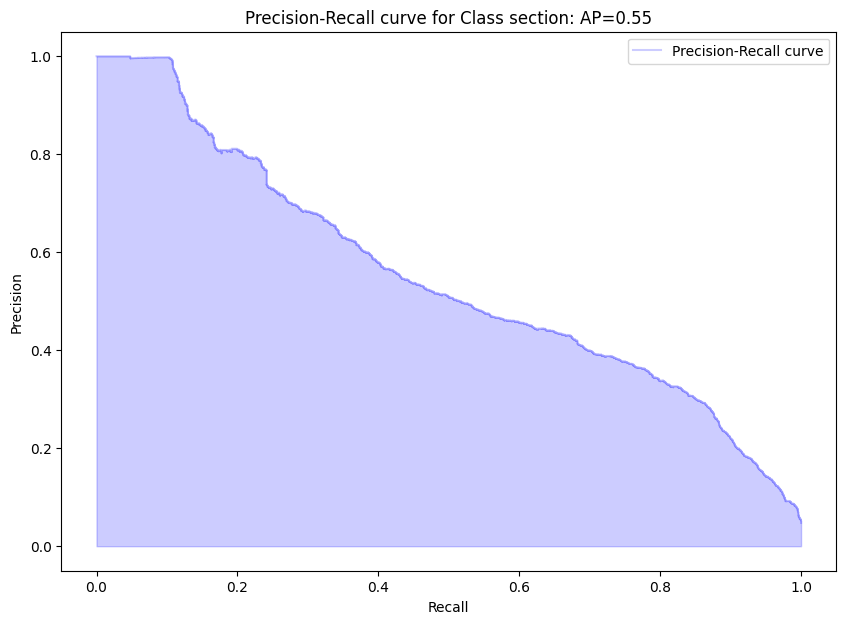

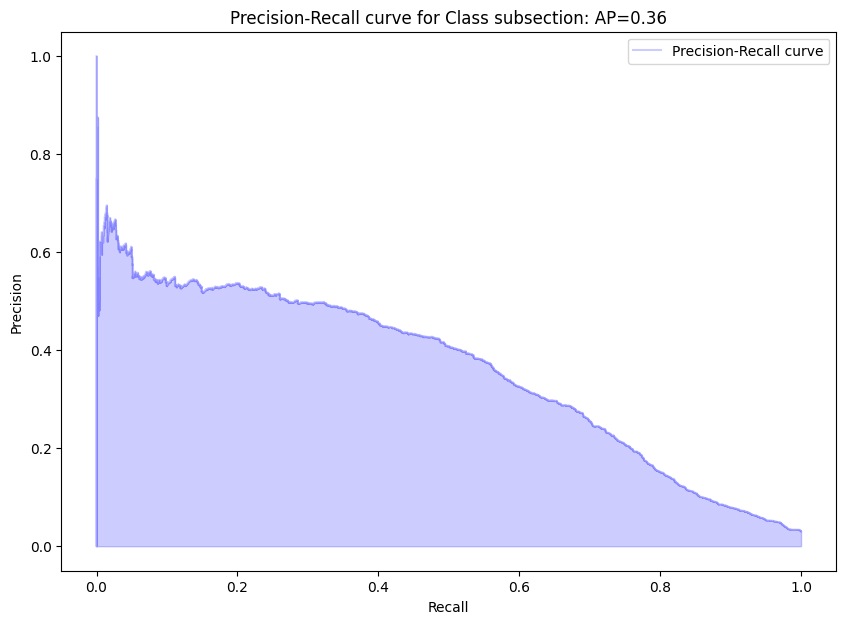

In [33]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, average_precision_score
# Plot Precision-Recall Curve
y_pred_prob = log_reg.predict_proba(X_test_scaled)

# Iterate over each class to calculate and plot precision-recall curve
for i in range(y_pred_prob.shape[1]):
    class_label = label_encoder.classes_[i]
    precision, recall, _ = precision_recall_curve(y_test_encoded == i, y_pred_prob[:, i]) # Treat each class as binary
    average_precision = average_precision_score(y_test_encoded == i, y_pred_prob[:, i])

    plt.figure(figsize=(10, 7))
    plt.step(recall, precision, where='post', color='b', alpha=0.2, label='Precision-Recall curve')
    plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall curve for Class {class_label}: AP={average_precision:.2f}') # Specify class in title
    plt.legend(loc='best')
    plt.show()

#### Random Forest Regression

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, average_precision_score, roc_curve, auc, roc_auc_score
import seaborn as sns
from sklearn.preprocessing import label_binarize

In [37]:
# Train a Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train_encoded)

RandomForestClassifier(random_state=42)

In [38]:
# Make predictions
y_pred = rf.predict(X_test_scaled)
y_pred_prob = rf.predict_proba(X_test_scaled)

Accuracy: 0.8444
Precision: 0.8416
Recall: 0.8444
F1 Score: 0.8420

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86     54340
           1       0.84      0.88      0.86     45046
           2       0.74      0.61      0.67      5129
           3       0.63      0.45      0.52      3264

    accuracy                           0.84    107779
   macro avg       0.77      0.70      0.73    107779
weighted avg       0.84      0.84      0.84    107779



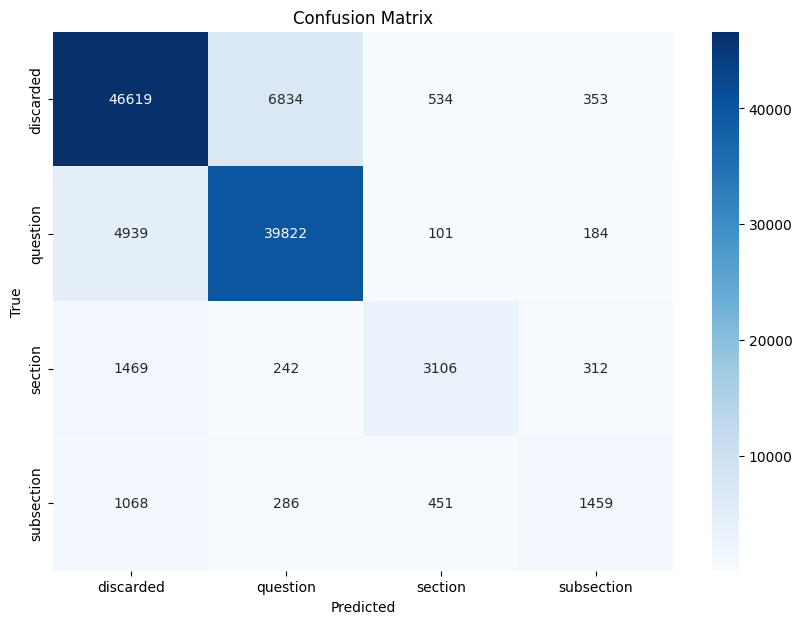

In [39]:
# Measure classification metrics
accuracy = accuracy_score(y_test_encoded, y_pred)
precision = precision_score(y_test_encoded, y_pred, average='weighted')
recall = recall_score(y_test_encoded, y_pred, average='weighted')
f1 = f1_score(y_test_encoded, y_pred, average='weighted')
class_report = classification_report(y_test_encoded, y_pred)
conf_matrix = confusion_matrix(y_test_encoded, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print('\nClassification Report:')
print(class_report)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

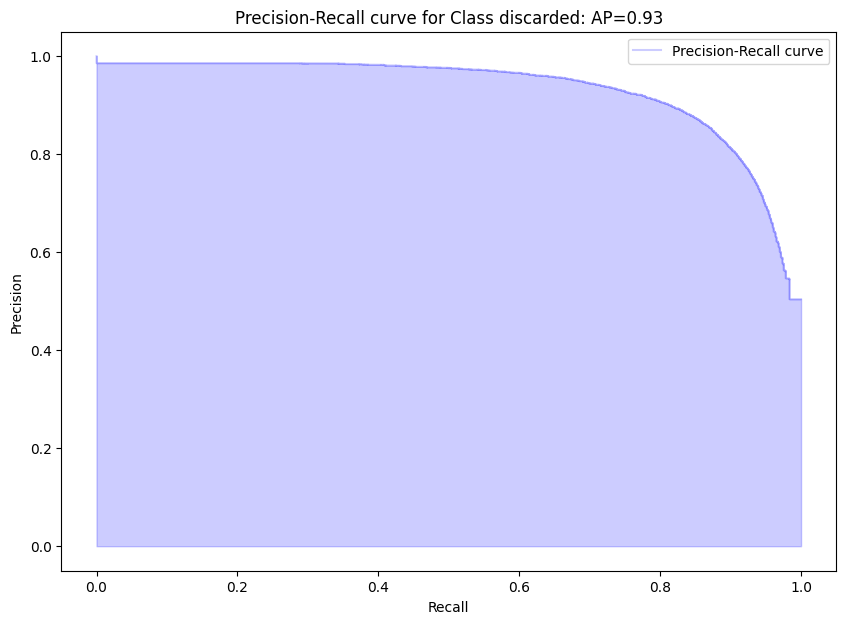

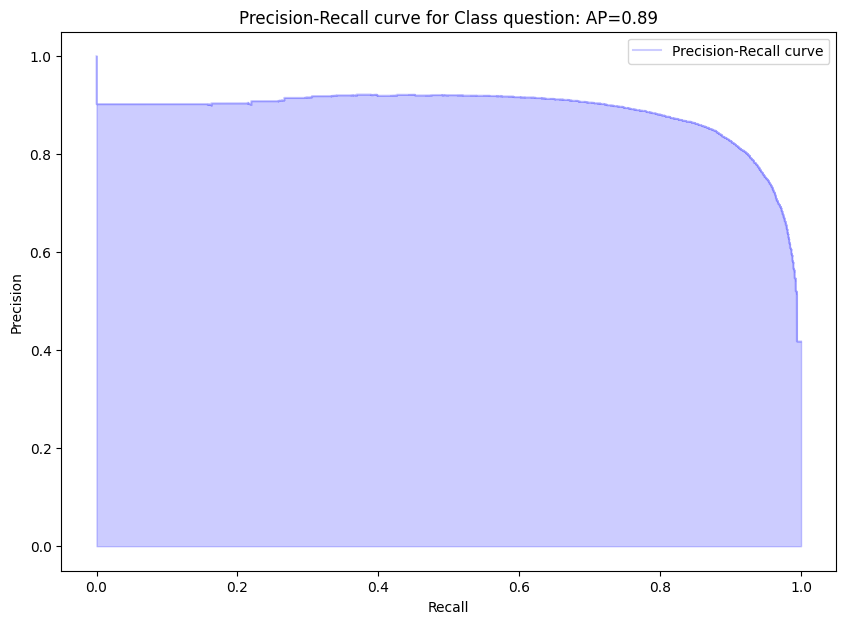

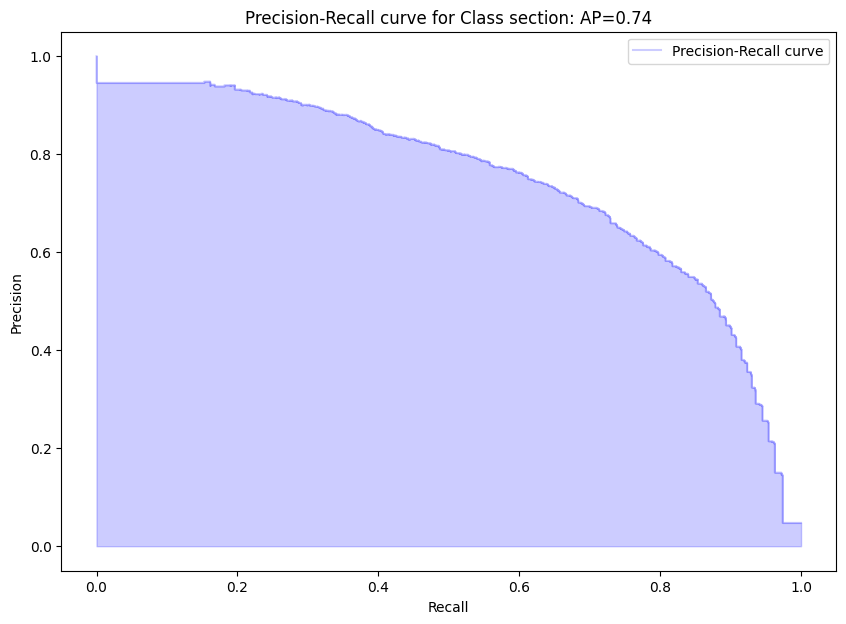

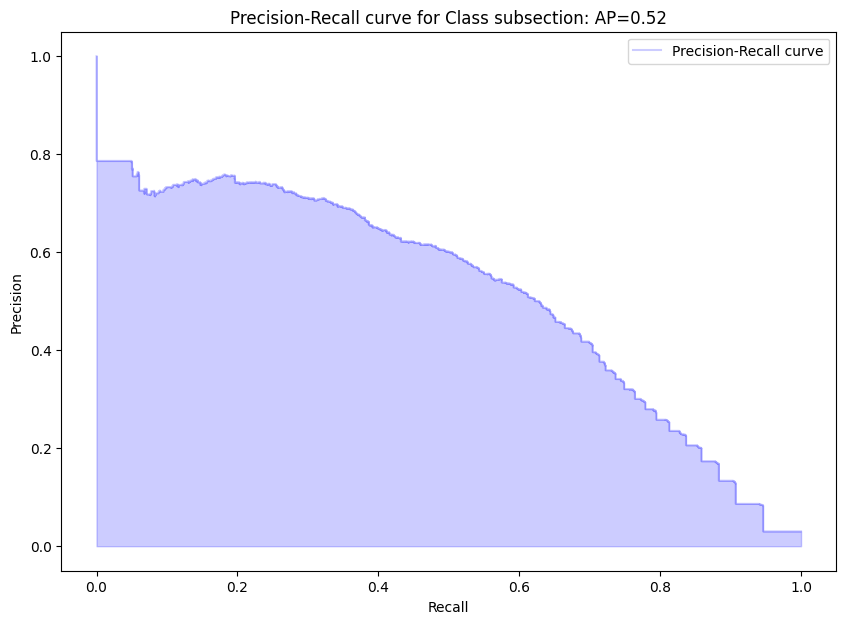

In [40]:
# Plot Precision-Recall Curve

# Iterate over each class to calculate and plot precision-recall curve
for i in range(y_pred_prob.shape[1]):
    class_label = label_encoder.classes_[i]
    precision, recall, _ = precision_recall_curve(y_test_encoded == i, y_pred_prob[:, i]) # Treat each class as binary
    average_precision = average_precision_score(y_test_encoded == i, y_pred_prob[:, i])

    plt.figure(figsize=(10, 7))
    plt.step(recall, precision, where='post', color='b', alpha=0.2, label='Precision-Recall curve')
    plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall curve for Class {class_label}: AP={average_precision:.2f}') # Specify class in title
    plt.legend(loc='best')
    plt.show()

#### Support Vector Machines (SVM)

# GRAVEYARD -- DNU BELOW HERE

In [ ]:
# Step 8: Build a logistic regression model
model = LogisticRegression(max_iter=10000)
model.fit(X_selected_tree, y_train)

# Step 9: Predict and evaluate the model
y_pred = model.predict(X_test_selected)
print(classification_report(y_test, y_pred))

In [18]:
np.arange(0.01,0.1,0.01)

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09])

In [19]:
pipeline = Pipeline([
                     ('scaler',StandardScaler()),
                     ('model',Lasso())
])

In [18]:
search = GridSearchCV(pipeline,
                      {'model__alpha':np.arange(0.01,0.1,0.01)},
                      cv = 5, scoring="neg_mean_squared_error",verbose=3
                      )

In [ ]:
search.fit(X,y_encoded)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


In [ ]:
search.best_params_

In [ ]:
coefficients = search.best_estimator_.named_steps['model'].coef_

In [ ]:
# only 4 features are important per Lasso
coefficients[importance>0]

In [ ]:
importance = np.abs(coefficients)

In [ ]:
X.columns[importance > 0]

In [ ]:
# Tree-Based Feature Importance: Use tree-based models to rank feature importance.
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100)
model.fit(X, y)
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]


In [ ]:
X_selected_tree = X_train.iloc[:, indices[:10]]
X_selected_tree = X_test.iloc[:, indices[:10]]

X_selected_tree.columns

In [ ]:
corr_matrix = X.corr()
target_corr_matrix = corr_matrix['target']

### Step 3: Modeling

In [ ]:
# train test split
unique_css_pk = df_sample['css_pk'].unique()
train_css_pk, test_css_pk = train_test_split(unique_css_pk, test_size=0.2, random_state=42)


train_df = df_sample[df_sample['css_pk'].isin(train_css_pk)]
test_df = df_sample[df_sample['css_pk'].isin(test_css_pk)]

# Step 4: Separate features and target
X_train = train_df.drop(columns=['css_pk', 'target'])
y_train = train_df['target']
X_test = test_df.drop(columns=['css_pk', 'target'])
y_test = test_df['target']

In [ ]:
# Step 8: Build a logistic regression model
model = LogisticRegression(max_iter=10000)
model.fit(X_train_selected, y_train)

# Step 9: Predict and evaluate the model
y_pred = model.predict(X_test_selected)
print(classification_report(y_test, y_pred))

In [ ]:
# Step 7: Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 8: Fit a Lasso regression model
lasso = Lasso(alpha=0.1, max_iter=10000)  # Adjust alpha for regularization strength
lasso.fit(X_train_scaled, y_train_encoded)

# Step 9: Extract feature importance
importance = np.abs(lasso.coef_)
feature_names = X_train.columns

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the most important features
print(feature_importance_df.head(20))

# Optional: Visualize the feature importance
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'].head(20), feature_importance_df['Importance'].head(20))
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 20 Feature Importances from Lasso Regression')
plt.gca().invert_yaxis()
plt.show()

ValueError: could not convert string to float: 'text'

In [ ]:
df_sample.to_csv('loopio_team3/sample.csv')

In [ ]:
# Step 5: One-hot encode categorical features
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

X_train_encoded = encoder.fit_transform(X_train[categorical_cols])
X_test_encoded = encoder.transform(X_test[categorical_cols])

X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=encoder.get_feature_names_out(categorical_cols))
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=encoder.get_feature_names_out(categorical_cols))

# Drop original categorical columns and concatenate encoded columns
X_train = X_train.drop(columns=categorical_cols).reset_index(drop=True)
X_test = X_test.drop(columns=categorical_cols).reset_index(drop=True)
X_train = pd.concat([X_train, X_train_encoded_df], axis=1)
X_test = pd.concat([X_test, X_test_encoded_df], axis=1)

# Step 6: Encode the target variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Step 7: Add the encoded target variable back to the dataframe for correlation calculation
X_train['target'] = y_train_encoded
X_test['target'] = y_test_encoded

# Optional: Downsample the training data further if needed for memory constraints
# X_train = X_train.sample(n=sample_size, random_state=42)

# Step 8: Calculate the correlation matrix on the training data
# corr_matrix = X_train.corr()

# Step 9: Visualize the correlation matrix
# plt.figure(figsize=(12, 10))
# heatmap = sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
# plt.title('Correlation Matrix')
# plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
corr_matrix['target'].sort_values(ascending=False)

target                         1.000000
lang_ls_qm                     0.258443
begins_with_number             0.221849
style_heading                  0.162232
lang_pct_possessive_pronoun    0.130761
                                 ...   
lang_pct_cardinal_digit       -0.110590
is_title                      -0.116317
form_rel_font_size            -0.121209
lang_ls_alnum                 -0.157020
begins_with_text              -0.221849
Name: target, Length: 7596, dtype: float64

In [ ]:
corr_matrix.to_csv('loopio_team3/corr_matrix_target_variable.csv')

In [ ]:
# number unique values -- most seem to be discarded?
df_sample.groupby('target')['css_pk'].nunique()

target
discarded     2512
question      1480
section        125
subsection     102
Name: css_pk, dtype: int64

In [ ]:
# number unique values -- most seem to be discarded?
df.groupby('target')['css_pk'].nunique()

target
discarded     27346
question      29501
section       20939
subsection     9829
Name: css_pk, dtype: int64

### Step 2: Train/Test Split

In [ ]:
# Step 2: Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import classification_report

In [ ]:
X_train.drop(columns=['target'], inplace=True)
X_test.drop(columns=['target'], inplace=True)

In [ ]:
search.best_params_

{'model__alpha': 0.1}

In [ ]:
coefficients = search.best_estimator_.named_steps['model'].coef_

In [ ]:
# only 4 features are important per Lasso
coefficients[importance>0]

array([ 6.31174690e-02,  5.11793246e-03,  3.33289347e-02, -3.86106241e-16])

In [ ]:
importance = np.abs(coefficients)

In [ ]:
X_train.columns[importance > 0]

Index(['lang_ls_qm', 'style_heading', 'begins_with_number',
       'begins_with_text'],
      dtype='object')

In [ ]:
X_train_impt_lasso = X_train[X_train.columns[importance > 0]]
X_test_impt_lasso = X_test[X_train.columns[importance > 0]]

                         Feature    Importance
12                    lang_ls_qm  6.311747e-02
81            begins_with_number  3.332893e-02
35                 style_heading  5.117932e-03
82              begins_with_text  3.861062e-16
0                    customer_pk  0.000000e+00
5061  id_325871|4508125|545CA5AB  0.000000e+00
5071  id_326696|4518006|30D4551A  0.000000e+00
5070  id_326668|4517670|44BB24CD  0.000000e+00
5069  id_326538|4516146|62FA6E16  0.000000e+00
5068  id_326527|4516080|4A6E18A3  0.000000e+00
5067  id_326527|4516080|03FDF032  0.000000e+00
5066  id_326500|4515738|79FAB1A6  0.000000e+00
5065  id_326124|4511511|071F0AD9  0.000000e+00
5064  id_326105|4511280|6252BA9D  0.000000e+00
5063  id_326001|4509927|12B9D3E1  0.000000e+00
5062  id_325895|4508359|0000033D  0.000000e+00
5060  id_325843|4507946|032C668A  0.000000e+00
5073  id_326850|4520366|2E006989  0.000000e+00
5059   id_325754|4506357|para_cl  0.000000e+00
5058  id_325737|4505945|7A4EA8E5  0.000000e+00


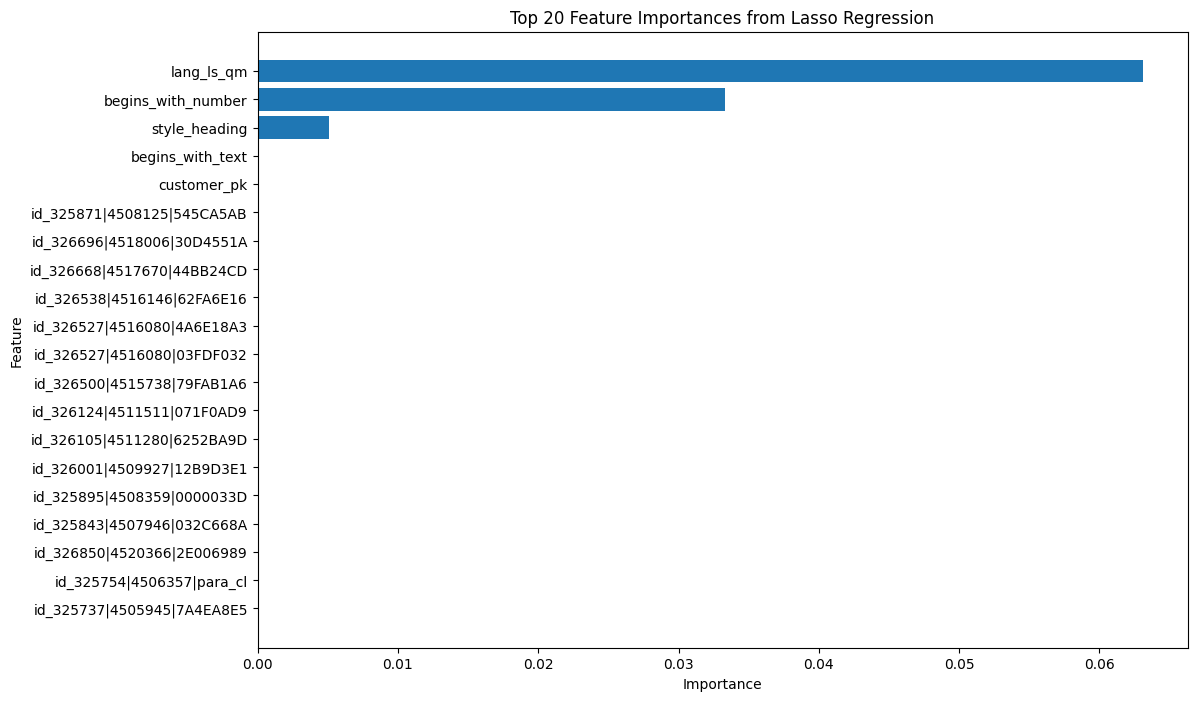

In [ ]:
# Step 7: Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 8: Fit a Lasso regression model
lasso = Lasso(alpha=0.1, max_iter=10000)  # Adjust alpha for regularization strength
lasso.fit(X_train_scaled, y_train_encoded)

# Step 9: Extract feature importance
importance = np.abs(lasso.coef_)
feature_names = X_train.columns

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the most important features
print(feature_importance_df.head(20))

# Optional: Visualize the feature importance
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'].head(20), feature_importance_df['Importance'].head(20))
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 20 Feature Importances from Lasso Regression')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
unique_values = pd.Series(y_train_encoded).unique()
print(unique_values)

[0 1 3 2]


### Step 3: Feature Selection and Filtering

Index(['lang_mean_words_per_sent', 'lang_num_words', 'lang_ls_qm',
       'lang_pct_preposition_subordinating_conjunction', 'lang_pct_punct',
       'lang_pct_noun_singular', 'customer_pk', 'form_rel_font_size',
       'lang_pct_noun_plural', 'lang_pct_proper_noun_singular'],
      dtype='object')

In [ ]:
# # Recursive Feature Elimination (RFE): Selects features by recursively considering smaller sets.
# from sklearn.feature_selection import RFE
# from sklearn.linear_model import LogisticRegression

# model = LogisticRegression(max_iter=10000)
# selector = RFE(model, n_features_to_select=10, step=1)
# X_train_selected_RFE = selector.fit_transform(X_train, y_train)
# X_test_selected_RFE = selector.transform(X_test)


# report which features were selected by RFE
from sklearn.datasets import make_classification
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
# define RFE
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)
# fit RFE
rfe.fit(X_train, y_train)
# summarize all features
for i in range(X.shape[1]):
 print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

In [ ]:
# explore the algorithm wrapped by RFE
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

# get the dataset
def get_dataset():
 X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
 return X, y

# get a list of models to evaluate
def get_models():
 models = dict()
 # lr
 rfe = RFE(estimator=LogisticRegression(), n_features_to_select=5)
 model = DecisionTreeClassifier()
 models['lr'] = Pipeline(steps=[('s',rfe),('m',model)])
 # perceptron
 rfe = RFE(estimator=Perceptron(), n_features_to_select=5)
 model = DecisionTreeClassifier()
 models['per'] = Pipeline(steps=[('s',rfe),('m',model)])
 # cart
 rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)
 model = DecisionTreeClassifier()
 models['cart'] = Pipeline(steps=[('s',rfe),('m',model)])
 # rf
 rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=5)
 model = DecisionTreeClassifier()
 models['rf'] = Pipeline(steps=[('s',rfe),('m',model)])
 # gbm
 rfe = RFE(estimator=GradientBoostingClassifier(), n_features_to_select=5)
 model = DecisionTreeClassifier()
 models['gbm'] = Pipeline(steps=[('s',rfe),('m',model)])
 return models

# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
 cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
 scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
 return scores

# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
 scores = evaluate_model(model, X, y)
 results.append(scores)
 names.append(name)
 print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso

In [ ]:
# Step 7: Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 8: Fit a Lasso regression model
lasso = Lasso(alpha=0.01, max_iter=10000)  # Adjust alpha for regularization strength
lasso.fit(X_train_scaled, y_train_encoded)

# Step 9: Extract feature importance
importance = np.abs(lasso.coef_)
feature_names = X_train.columns

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the most important features
print(feature_importance_df.head(20))

# Optional: Visualize the feature importance
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'].head(20), feature_importance_df['Importance'].head(20))
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 20 Feature Importances from Lasso Regression')
plt.gca().invert_yaxis()
plt.show()

Fitting 5 folds for each of 99 candidates, totalling 495 fits
[CV 1/5] END ....................model__alpha=0.1;, score=nan total time=   0.8s
[CV 2/5] END ....................model__alpha=0.1;, score=nan total time=   0.8s
[CV 3/5] END ....................model__alpha=0.1;, score=nan total time=   0.8s
[CV 4/5] END ....................model__alpha=0.1;, score=nan total time=   0.8s
[CV 5/5] END ....................model__alpha=0.1;, score=nan total time=   0.8s
[CV 1/5] END ....................model__alpha=0.2;, score=nan total time=   0.8s
[CV 2/5] END ....................model__alpha=0.2;, score=nan total time=   0.8s
[CV 3/5] END ....................model__alpha=0.2;, score=nan total time=   0.8s
[CV 4/5] END ....................model__alpha=0.2;, score=nan total time=   0.8s
[CV 5/5] END ....................model__alpha=0.2;, score=nan total time=   0.8s
[CV 1/5] END ....model__alpha=0.30000000000000004;, score=nan total time=   0.8s
[CV 2/5] END ....model__alpha=0.300000000000000

ValueError: 
All the 495 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
495 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py", line 908, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 584, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 1122, in check_X_y
    y = _check_y(y, multi_output=multi_output, y_numeric=y_numeric, estimator=estimator)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 1147, in _check_y
    y = y.astype(np.float64)
ValueError: could not convert string to float: 'discarded'


In [ ]:
search.best_params_

In [ ]:
coefficients = search.best_estimator_.named_steps['model'].coef_

In [ ]:
importance = np.abs(coefficients)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Step 5: Encode the target variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

X = X_train.copy()

X['target'] = y_train_encoded
corr_matrix = X.corr()

# Step 7: Visualize the correlation matrix
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Step 6: Feature selection
selector = SelectKBest(score_func=f_classif, k='all')  # You can specify 'k' to be the number of top features you want to keep
selector.fit(X_train, y_train)
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [53 80] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [ ]:
# Step 8: Build a logistic regression model
model = LogisticRegression(max_iter=10000)
model.fit(X_train_selected, y_train)

# Step 9: Predict and evaluate the model
y_pred = model.predict(X_test_selected)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

   discarded       0.80      0.93      0.86      1391
    question       0.79      0.55      0.65       581
     section       0.10      0.03      0.05        30
  subsection       0.17      0.03      0.05        38

    accuracy                           0.79      2040
   macro avg       0.47      0.39      0.40      2040
weighted avg       0.78      0.79      0.77      2040



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
